In [3]:
import requests
import os
import json

from lxml import etree
import io
import mysocket as sock
from IPython.display import Image

dirname = 'public_data'
filename = 'school.xml'
school_path = os.path.join(dirname, filename)

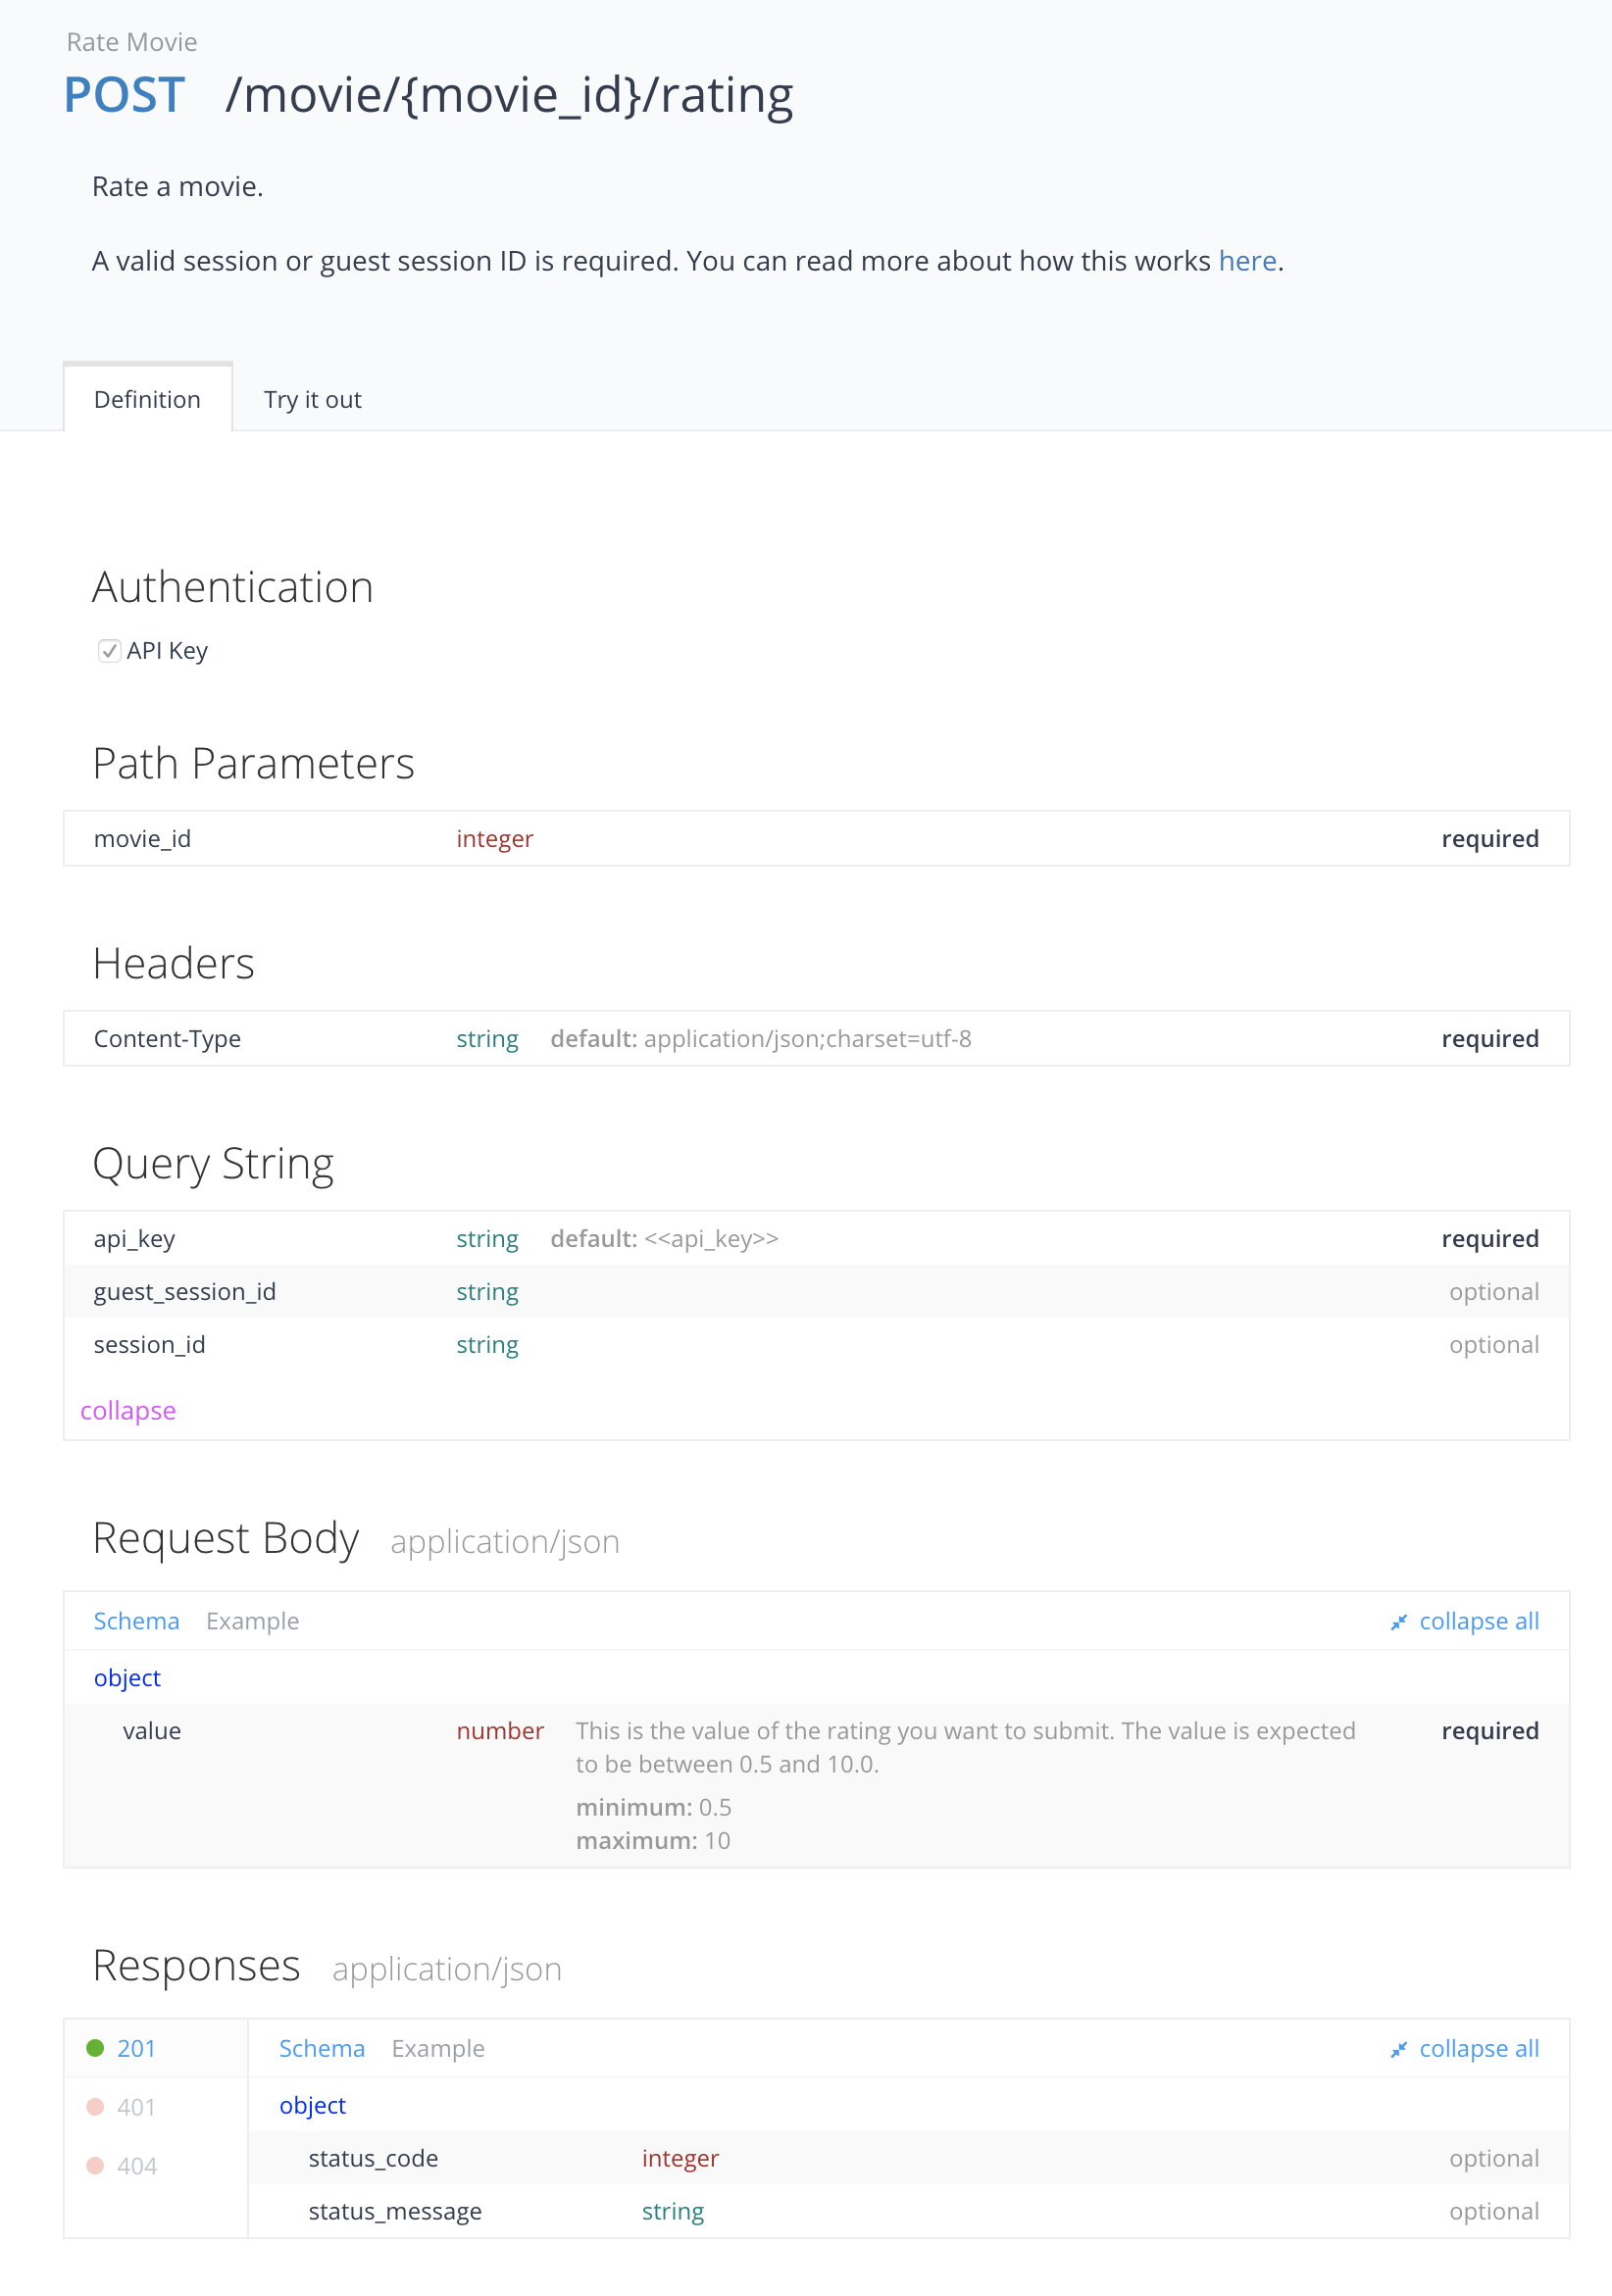

In [13]:
Image("figs/TMDB_Rate_Movie.png", width=600)

In [15]:
def buildURL(resource_path, host="http.bin", protocol="http", port=80):
    url_template = "{}://{}:{}/{}"
    url = url_template.format(protocol, host, port, resource_path)
    return url

In [16]:
request_msg0 = "POST /almanac/transportation_data/gasoline/margins/index_cms.php HTTP/1.1\r\nHost: ww2.energy.ca.gov\r\nConnection: close\r\n\r\nyear=2011&newYear=Get+different+year"

In [17]:
request_lines = [
    "POST /almanac/transportation_data/gasoline/margins/index_cms.php HTTP/1.1\r\n",
    "Host: ww2.energy.ca.gov\r\n",
    "Connection: close\r\n",
    "\r\n",
    "year=2011&newYear=Get+different+year"
]

In [18]:
request_msg1 = "".join(request_lines)

In [19]:
request_msg0 == request_msg1

True

In [20]:
request_msg2 = ""
for line in request_lines:
    request_msg2 = request_msg2 + line

In [21]:
request_msg2 == request_msg0

True

In [22]:
request_line = "GET /~bressoud/datasystems/basic.html HTTP/1.1\r\n"
empty_line = "\r\n"

## Data Systems Sources

### Q1: All About Headers

This question has two parts, both involving the set of **Header Lines** in an HTTP request or response message:

#### Q1A: Request Headers (4 points)

We have seen how the `requests` module makes headers for a GET or POST easy: we simply pass a dictionary with the desired headers as an argument, and it translates that as part of the character sequence defined by HTTP in its request message.  Here, we are asking you to do the same.

Define a function:

    makeRequestHeaders(headerD)
    
that translates the given dictionary, `headerD` into a **single string** that is in syntactically correct HTTP, suitable that it could be sent by `sock.sendString` *after the request line* and *before the empty line* in a GET or POST. For example, if `request_line` had an HTTP valid GET request, and `empty_line` were defined as the HTTP empty line:

```
D = {'Host': 'personal.denison.edu', 'Connection': 'close'}

sock.sendString(request_line)
sock.sendString(makeHeaders(D))
sock.sendString(empty_line)
```

Return the string you produce.

In [23]:
def makeRequestHeaders(headerD):
    pass

In [ ]:
headerD = {'Host': 'personal.denison.edu', 'Connection': 'close'}

In [ ]:
# Develop a solution using `headerD`



In [24]:
# Testing cell

### BEGIN HIDDEN TESTS
assert ':' in makeRequestHeaders({'Connection':'close','Agent':'text/html', 'Transfer-Encoding': 'chunked'})
### END HIDDEN TESTS

In [25]:
# Testing cell

### BEGIN HIDDEN TESTS
assert '\r\n' in makeRequestHeaders({'Connection':'close','Agent':'text/html', 'Transfer-Encoding': 'chunked'})
### END HIDDEN TESTS

In [26]:
# Testing cell

### BEGIN HIDDEN TESTS
assert 'Accept-Ranges: bytes' in makeRequestHeaders({'Connection':'close','Accept-Ranges': 'bytes','Agent':'text/html', 'Transfer-Encoding': 'chunked'})
### END HIDDEN TESTS

In [27]:
# Testing cell

### BEGIN HIDDEN TESTS
assert len(makeRequestHeaders({'Connection':'close', 'Accept-Ranges': 'bytes'})) == 41
### END HIDDEN TESTS

#### Q1B: Reply Headers (5 points)

Suppose we have a **single string** that comprises a **complete and valid HTTP reply message** from a server in response to a client request.  If using HTTP/1.0 or a connection close header in the request, this could be obtained as:
```
reply_msg = sock.receiveTillClose(conn)
```
that followed a send over the socket of a valid request.

You are to write a function:

    getReplyHeaders(reply_msg)
    
that, given a complete and valid HTTP reply message, extracts the substring of **just the sequence of characters for the header lines in the reply**.

An example `reply_msg` as an argument string might begin with the sequence: `HTTP/1.1 200` and end with the sequence `</body></html>` for a reply whose contents contains an HTML result.  You should **only** assume that `reply_msg` is a syntactically correct HTTP reply message.

In [34]:
conn = sock.makeConnection("personal.denison.edu", 80)

request_lines = [
    "GET /~bressoud/datasystems/basic.html HTTP/1.1\r\n",
    "Host: personal.denison.edu\r\n",
    "Connection: close\r\n",
    "\r\n",
]

for line in request_lines:
    sock.sendString(conn, line)
reply_msg = sock.receiveTillClose(conn)

conn.close()

In [35]:
print(reply_msg)

HTTP/1.1 200 OK
Date: Wed, 22 Apr 2020 13:05:14 GMT
Server: Apache
Accept-Ranges: bytes
Content-Length: 493
Connection: close
Content-Type: text/html; charset=iso-8859-1

<!DOCTYPE html>
<html  xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
  <head>
    <title>CS-181 Basic HTML Page</title>
  </head>
  <body>
    <h1>First Level Heading</h1>

    <p>Paragraph defined in <b>body</b>.

    <h2>Second Level Heading</h2>

    <a href=http://personal.denison.edu/~bressoud/>Link</a> to Dr. B's Home page.
    </p>

<ul>
<li>Item 1
<ol>
<li>Item 1 nested</li>
<li>Item 2 nested</li>
</ol>
</li>
<li>Item 2</li>
<li>Item 3</li>
</ul>
  </body>
</html>



In [36]:
print(repr(reply_msg))

'HTTP/1.1 200 OK\r\nDate: Wed, 22 Apr 2020 13:05:14 GMT\r\nServer: Apache\r\nAccept-Ranges: bytes\r\nContent-Length: 493\r\nConnection: close\r\nContent-Type: text/html; charset=iso-8859-1\r\n\r\n<!DOCTYPE html>\n<html  xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n  <head>\n    <title>CS-181 Basic HTML Page</title>\n  </head>\n  <body>\n    <h1>First Level Heading</h1>\n\n    <p>Paragraph defined in <b>body</b>.\n\n    <h2>Second Level Heading</h2>\n\n    <a href=http://personal.denison.edu/~bressoud/>Link</a> to Dr. B\'s Home page.\n    </p>\n\n<ul>\n<li>Item 1\n<ol>\n<li>Item 1 nested</li>\n<li>Item 2 nested</li>\n</ol>\n</li>\n<li>Item 2</li>\n<li>Item 3</li>\n</ul>\n  </body>\n</html>\n'


In [44]:
def getReplyHeaders(reply_msg):
    pass

In [45]:
# Develop Solution Using `reply_msg`



In [47]:
### BEGIN HIDDEN TESTS
assert '\r\n' in getReplyHeaders(reply_msg)
assert reply_msg[:2] != '\r\n'
### END HIDDEN TESTS

In [48]:
### BEGIN HIDDEN TESTS
assert '\r\n\r\n' not in getReplyHeaders(reply_msg)
### END HIDDEN TESTS

In [49]:
### BEGIN HIDDEN TESTS
assert 'HTTP/' not in getReplyHeaders(reply_msg)
### END HIDDEN TESTS


In [52]:
### BEGIN HIDDEN TESTS
assert len(getReplyHeaders(reply_msg)) == 160
### END HIDDEN TESTS


### Q2: Socket Level POST (7 points)

Write a function 

    makePOSTMessage(host, version, path, ctype, body)
    
that creates and returns a string suitable to send as a valid HTTP `POST` request over a sockets interface.  The parameters to the function:

- `host`: the destination server host (e.g., `'personal.denison.edu'`), which would also be used in establishing the connection (outside the scope of this function).
- `version` (e.g., `'HTTP/1.1'` or `'HTTP/1.0'`), 
- `path`: the resource path of the request (e.g., `~whiteda/myFormToPostTo`)
- `ctype`: one of `'keep-alive'` or `'close'` to indicate, in the protocol, how the connection should be handled on completion of the request.
- `body`: the character string to be used in the *body* of the post.

All arguments are strings.

An example invocation:
```
host = 'httpbin.org`
conn = sock.makeConnection(host, 80)
msg = makePostMessage(host, 'HTTP/1.1', '/post', 'close', 'Wow, what a cool string!')
sock.sendString(msg)

# then retrieve reply and process
```

In [54]:
host = 'ww2.energy.ca.gov'
version = 'HTTP/1.1'
path = '/almanac/transportation_data/gasoline/margins/index_cms.php'
ctype = 'close'
body = "year=2011&newYear=Get+different+year"

In [57]:
def makePOSTMessage(host, version, path, ctype, body):
    pass

In [58]:
# Develop solution using host, version, path, ctype, body



In [59]:
### BEGIN HIDDEN TESTS
request_message = makePOSTMessage('ww2.energy.ca.gov','HTTP/1.1','/almanac/transportation_data/gasoline/margins/index_cms.php','keep-alive',"year=2011&newYear=Get+different+year")
assert 'POST' in request_message
assert 'Host' in request_message
### END HIDDEN TESTS

In [60]:
### BEGIN HIDDEN TESTS
assert 'Connection: ' in request_message
assert 'keep-alive' in request_message
### END HIDDEN TESTS

In [61]:
### BEGIN HIDDEN TESTS
assert '\r\n' in request_message
### END HIDDEN TESTS

In [62]:
### BEGIN HIDDEN TESTS
assert '\r\n\r\n' in request_message
### END HIDDEN TESTS

In [63]:
### BEGIN HIDDEN TESTS
request_message = makePOSTMessage('httpbin.org','HTTP/1.0','/post','close',"Wow, what a cool string!")
assert 'HTTP/1.0' in request_message
### END HIDDEN TESTS

In [64]:
### BEGIN HIDDEN TESTS
request_message = makePOSTMessage('httpbin.org','HTTP/1.0','/post','close',"Wow, what a cool string!")
assert 'httpbin.org' in request_message
### END HIDDEN TESTS

In [65]:
### BEGIN HIDDEN TESTS
request_message = makePOSTMessage('httpbin.org','HTTP/1.1','/post','close',"Wow, what a cool string!")
assert "Wow, what a cool string!" in request_message
### END HIDDEN TESTS

### Q3: Networking (8 points)

Consider the `A` to `E` representation our network protocol stack:

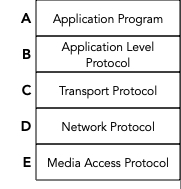

In [39]:
Image("figs/stack.jpg", width=200)

Now consider the following word-based characterizations, where the item may characterize a level, a realization of a level, or it might identify an *interface* to a level.  

1. Reliable byte stream
2. 5G
3. `socket`/`mysocket`
4. Lossy host to host delivery
5. Client in Jupyter notebook
6. `requests` module
7. Application to application delivery
    
This is really a matching problem.  In the cell that follows, assign to the variable `A` an integer list containing all the matches for level `A`, Repeat for `B` through `E`.  If none of the numbered characterizations are a *best match* for a level, you can assign the empty list to the letter. Each number should appear in exactly one list.

So, for example, if the media access protocol was realized by the requests module and provided a reliable byte stream, you would have `E = [1, 6]`.

In [40]:
A = []
B = []
C = []
D = []
E = []
### BEGIN SOLUTION
A = [5]
B = [6]
C = [1, 3, 7]
D = [4]
E = [2]
### END SOLUTION

In [41]:
### BEGIN HIDDEN TESTS
print(A)
assert 5 in A
### END HIDDEN TESTS

[5]


In [42]:
### BEGIN HIDDEN TESTS
print(A)
for x in [1,2,3,4,6,7]:
    assert x not in A
### END HIDDEN TESTS

[5]


In [43]:
### BEGIN HIDDEN TESTS
print(B)
assert 6 in B
### END HIDDEN TESTS

[6]


In [44]:
### BEGIN HIDDEN TESTS
print(B)
for x in [1,2,3,4,5,7]:
    assert x not in B
### END HIDDEN TESTS

[6]


In [45]:
### BEGIN HIDDEN TESTS
print(C)
assert 3 in C
### END HIDDEN TESTS

[1, 3, 7]


In [46]:
### BEGIN HIDDEN TESTS
print(C)
assert 1 in C
assert 7 in C
for x in [2,4,5,6]:
    assert x not in C
### END HIDDEN TESTS

[1, 3, 7]


In [47]:
### BEGIN HIDDEN TESTS
print(D)
assert 4 in D
for x in [1,2,3,5,6,7]:
    assert x not in D
### END HIDDEN TESTS

[4]


In [48]:
### BEGIN HIDDEN TESTS
print(E)
assert 2 in E
for x in [1,3,4,5,6,7]:
    assert x not in E
### END HIDDEN TESTS

[2]


### Q4: Getting a File Over the Network (10 points)

Write a function 

    GETFile(protocol, location, resource, bytes_or_text, enc)
    
that, through the `requests` module, uses an HTTP GET to

- obtain the specified `resource`,
- reads it into an appropriate *file-like object* (based on the argument `bytes_or_text`),
- **returns the string or bytes of data** obtained from the file-like object.

Argument notes:

- Please assume that `protocol` is always either `'http'` or `'https'`. 
- `location` will be like `'httpbin.org'` or `'personal.denison.edu'`.
- `resource` will be like `/~whiteda/myFile.jpg`
- `bytes_or_text` will be either `'bytes'` or `'text'`
- `enc` will be the encoding, e.g., `'utf-8'` or `'cp037'`

If the request is not successful, please return `None`.  

Partial credit will be given for a function that does not use the file-like object to accomplish its goal.

In [66]:
# Solution cell

### BEGIN SOLUTION

def GETFile(protocol, location, resource, bytes_or_text, enc):
    
    url = buildURL(resource, location, protocol)
    response = requests.get(url)
    if response.status_code != 200:
        return None
    response.encoding = enc
    if bytes_or_text == 'bytes':
        f = io.BytesIO(response.content)
    else:
        f = io.StringIO(response.text)
    s = f.read()
    return s


### END SOLUTION

protocol = "http"
location = "personal.denison.edu"
resource = "/~bressoud/datasystems/data/mystery4"
s = GETFile(protocol, location, resource, 'text', 'utf-8')
print(s[:200])


year,name,count
1880,Mary,7065
1881,Mary,6919
1882,Mary,8148
1883,Mary,8012
1884,Mary,9217
1885,Mary,9128
1886,Mary,9889
1887,Mary,9888
1888,Mary,11754
1889,Mary,11648
1890,Mary,12078
1891,Mary,11703



In [50]:
# Testing
### BEGIN HIDDEN TESTS
protocol = "http"
location = "personal.denison.edu"
resource = "/~bressoud/datasystems/data/mystery4"
s = GETFile(protocol, location, resource, 'text', 'utf-8')
assert type(s) is str
assert '1891,Mary,11703' in s
### END HIDDEN TESTS

In [51]:
# Testing
### BEGIN HIDDEN TESTS
resource = "/~bressoud/datasystems/data/mystery5"
s = GETFile(protocol, location, resource, 'bytes', None)
with open("public_data/mystery5", "rb") as f:
    data = f.read()
assert s == data
### END HIDDEN TESTS

In [52]:
### BEGIN HIDDEN TESTS
resource = "/~bressoud/datasystems/data/mystery6"
s = GETFile(protocol, location, resource, 'text', 'utf-16le')
with open("public_data/mystery6", "rt", encoding='utf-16le') as f:
    data = f.read()
assert s == data
### END HIDDEN TESTS

In [53]:
### BEGIN HIDDEN TESTS
resource = "/~bressoud/datasystems/data/mystery7"
s = GETFile(protocol, location, resource, 'text', 'utf-16le')
assert s == None
### END HIDDEN TESTS